# Minimum introduction to language modeling using Huggingface


### Install packages

In [1]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
!pip install transformers

In [3]:
# https://github.com/huggingface/datasets/issues/5406
%pip install datasets==2.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.4 MB/s eta 0:00:00


In [4]:
%pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.9 MB/s eta 0:00:00


In [5]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 7.3 MB/s eta 0:00:00


In [6]:
!pip install tqdm

In [7]:
%load_ext autoreload
%autoreload 2

### Download a pre-trained model

In [8]:
from tqdm import tqdm

import torch
import torch.nn as nn

from transformers import AutoModelForCausalLM, AutoTokenizer

In [9]:
torch.set_grad_enabled(False)

In [10]:
# model_name = 'tiiuae/falcon-7b'
# model_name = "EleutherAI/pythia-2.8b"
# model_name = "EleutherAI/pythia-6.9b"
model_name = 'openai-community/gpt2-xl'

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16,
    load_in_8bit=True,
    output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [11]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [12]:
# check model configurations
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Linear8bitLt(in_features=1600, out_features=4800, bias=True)
          (c_proj): Linear8bitLt(in_features=1600, out_features=1600, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Linear8bitLt(in_features=1600, out_features=6400, bias=True)
          (c_proj): Linear8bitLt(in_features=6400, out_features=1600, bias=True)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05,

In [13]:
# A closer look into the model; model parameters
for name, param in model.named_parameters():
    print(name)
    print(param.shape)


transformer.wte.weight
torch.Size([50257, 1600])
transformer.wpe.weight
torch.Size([1024, 1600])
transformer.h.0.ln_1.weight
torch.Size([1600])
transformer.h.0.ln_1.bias
torch.Size([1600])
transformer.h.0.attn.c_attn.weight
torch.Size([4800, 1600])
transformer.h.0.attn.c_attn.bias
torch.Size([4800])
transformer.h.0.attn.c_proj.weight
torch.Size([1600, 1600])
transformer.h.0.attn.c_proj.bias
torch.Size([1600])
transformer.h.0.ln_2.weight
torch.Size([1600])
transformer.h.0.ln_2.bias
torch.Size([1600])
transformer.h.0.mlp.c_fc.weight
torch.Size([6400, 1600])
transformer.h.0.mlp.c_fc.bias
torch.Size([6400])
transformer.h.0.mlp.c_proj.weight
torch.Size([1600, 6400])
transformer.h.0.mlp.c_proj.bias
torch.Size([1600])
transformer.h.1.ln_1.weight
torch.Size([1600])
transformer.h.1.ln_1.bias
torch.Size([1600])
transformer.h.1.attn.c_attn.weight
torch.Size([4800, 1600])
transformer.h.1.attn.c_attn.bias
torch.Size([4800])
transformer.h.1.attn.c_proj.weight
torch.Size([1600, 1600])
transformer.h.1

Do you understand what these parameters correspond to? Let's check this on the board.

In [14]:
# tokenizer basics

input_str = "subword units are necessary"

input_tokens = tokenizer.tokenize(input_str)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)

print(input_tokens)
print(input_ids)
# you should not a "weird" character (denoting a whitespace)

['sub', 'word', 'Ġunits', 'Ġare', 'Ġnecessary']
[7266, 4775, 4991, 389, 3306]


In [15]:
# let's prompt the model
input_text = 'Which city is the capital of the United States?'

input_ids = tokenizer(input_text, return_tensors="pt")
out = model.generate(input_ids['input_ids'], max_new_tokens=50, pad_token_id=tokenizer.eos_token_id)
result = tokenizer.decode(out[0])

print(result)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1659: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


Which city is the capital of the United States?

The capital of the United States is Washington, D.C.

What is the capital of the state of New York?

The capital of the state of New York is Albany.

What is the capital of the state


Note that GPT model above is pretty slow. There are models that are as good but faster: you could change model_name and retry.

In [16]:
# Runining out of ideas what to ask?
# Let's load some examples
# Here we use 'Vicuna' from https://lmsys.org/blog/2023-03-30-vicuna/
!wget https://raw.githubusercontent.com/lm-sys/FastChat/main/fastchat/llm_judge/data/vicuna_bench/question.jsonl

--2024-06-04 04:53:21--  https://raw.githubusercontent.com/lm-sys/FastChat/main/fastchat/llm_judge/data/vicuna_bench/question.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13125 (13K) [text/plain]
Saving to: ‘question.jsonl’

question.jsonl      100%[===================>]  12.82K  --.-KB/s    in 0s      

2024-06-04 04:53:21 (96.4 MB/s) - ‘question.jsonl’ saved [13125/13125]



In [17]:
# let's organize this dataset as a dictionary
import json

file_path = './question.jsonl'

with open(file_path, 'r') as json_file:
    json_list = list(json_file)

vicuna_dataset = {}

for json_str in json_list:
    result = json.loads(json_str)
    # turns, categories, question_id
    prompt = result['turns'][0]
    assert len(result['turns']) == 1
    category = result['category']
    if not category in vicuna_dataset:
        vicuna_dataset[category] = []
    vicuna_dataset[category].append(prompt)

In [18]:
# let's check categories
print(vicuna_dataset.keys())

# and one example
print(vicuna_dataset['math'][1])

dict_keys(['generic', 'knowledge', 'roleplay', 'common-sense', 'fermi', 'counterfactual', 'coding', 'math', 'writing'])
Solve for x in the equation 3x + 10 = 5(x - 2).


In [19]:
# try other categories or examples.

In [20]:
# Let's feed an example to the LM.

input_text = vicuna_dataset['math'][1]

input_ids = tokenizer(input_text, return_tensors="pt")
out = model.generate(input_ids['input_ids'], max_new_tokens=100, pad_token_id=tokenizer.eos_token_id)
result = tokenizer.decode(out[0])

print(result)


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1659: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


Solve for x in the equation 3x + 10 = 5(x - 2).

Solution:

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(x - 2)

x = 5(


### helper code to run when hitting CUDA OOM error

In [21]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

## Visualizing some weights

In [22]:
import matplotlib.pyplot as plt

In [23]:
# lookup the parameter name and adapt
data = model.transformer.h[7].mlp.c_proj.weight.data.to('cpu').numpy()

In [24]:
data.shape

(1600, 6400)

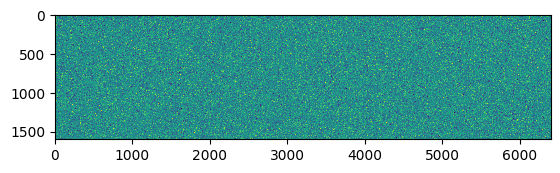

In [25]:
plt.imshow(data, interpolation='none')

# Important:

If you are using Colab, please do not forget to "disconnect and delete runtime" if you move to another notebook! (see "Runtime" tab above)